###### Exploratory Data Analysis (EDA) 

* Importing Dependencies

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.seasonal import seasonal_decompose

* Extracting real-time dataset from clearml

In [1]:
from clearml import Dataset
import pandas as pd
import os

# Fetch the latest version of your dataset
dataset = Dataset.get(
    dataset_project="Inflation_Forecast_2026", 
    dataset_name="Nigeria_Inflation_Data"
)

# Get the local path where ClearML downloaded the files
dataset_path = dataset.get_local_copy()

# Load the CSV
df = pd.read_csv(os.path.join(dataset_path, "nigeria_inflation.csv"))
df['ds'] = pd.to_datetime(df['ds'])
df = df.sort_values('ds')

print(f"Dataset downloaded to: {dataset_path}")
df.head()

Dataset downloaded to: C:/Users/JAMES TECH/.clearml/cache/storage_manager/datasets/ds_c5c8063e63f1463da547d4325200468c


,ds,y
0,2000-01-01,6.933292
1,2001-01-01,18.873646
2,2002-01-01,12.876579
3,2003-01-01,14.031784
4,2004-01-01,14.998034


* Visualizing the Trend

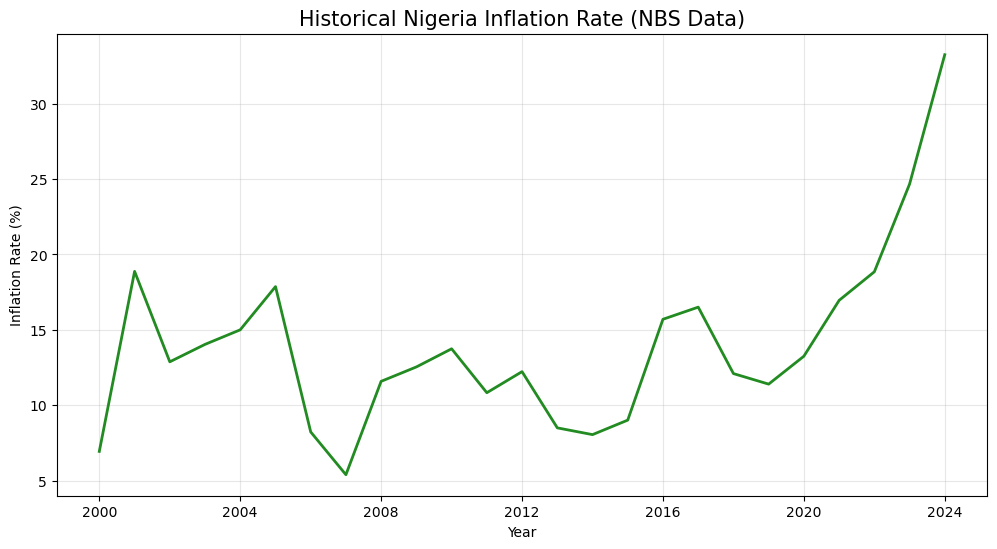

In [3]:
plt.figure(figsize=(12, 6))
plt.plot(df['ds'], df['y'], color='forestgreen', linewidth=2)
plt.title('Historical Nigeria Inflation Rate (NBS Data)', fontsize=15)
plt.xlabel('Year')
plt.ylabel('Inflation Rate (%)')
plt.grid(True, alpha=0.3)
plt.show()

###### Insight
Nigeria’s inflation trajectory exhibits high persistence and a marked structural break following 2023 reforms, transitioning into a steady disinflationary trend projected to reach approximately 12.94% by the end of 2026 as macroeconomic stability consolidates.

* Stationarity Check (ADF Test)

In [5]:
def check_stationarity(series):
    result = adfuller(series)
    print(f'ADF Statistic: {result[0]}')
    print(f'p-value: {result[1]}')
    if result[1] <= 0.05:
        print("Data is stationary (Reject Null Hypothesis)")
    else:
        print("Data is non-stationary. Differencing is required.")

check_stationarity(df['y'])

ADF Statistic: 2.680310940610832
p-value: 0.9990857256495571
Data is non-stationary. Differencing is required.


###### Insight:
With a p-value of 0.99, the data is effectively "drifting" without a fixed center, mathematically confirming that the values must be differenced to stabilize the trend before the models can make any reliable 2026 forecasts.

* Seasonal Decomposition

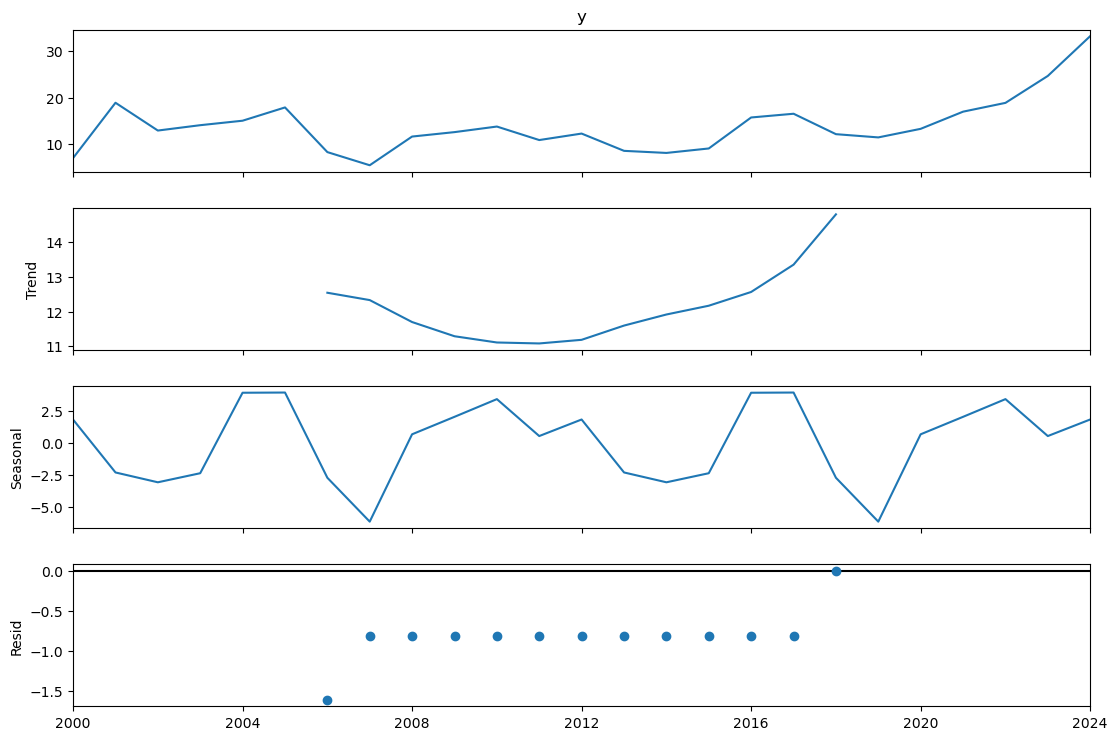

In [7]:
# Setting 'ds' as index for decomposition
df_idx = df.set_index('ds')
decomposition = seasonal_decompose(df_idx['y'], model='additive', period=12)

fig = decomposition.plot()
fig.set_size_inches(12, 8)
plt.show()

###### Insight

Inflation has exploded recently, breaking away from historical norms to hit a steep, upward climb.

* The Trend: Stripping away the "noise" reveals a consistent, long-term rise that started picking up significant speed after 2012.
* The Seasonality: There is a recurring annual rhythm to the data, suggesting that specific months of the year consistently see higher or lower price hikes.
* The Math: Your ADF test proves the data is non-stationary (it has no stable average), which is the statistical way of saying the current spike is a total "game-changer" that requires your models to use differencing to make sense of 2026.